In [1]:
from textblob import *
import numpy as np 
import pandas as pd
import plotly.express as px

In [2]:
data = pd.read_csv('df_after_preprocessing.csv',delimiter=';')

In [3]:
print(data.columns)

Index(['snippet'], dtype='object')


In [4]:
data['polarity'] = data['snippet'].map(lambda text: TextBlob(text).sentiment.polarity)

In [5]:
print(data.columns)
print(data.shape)
print(data['polarity'])

Index(['snippet', 'polarity'], dtype='object')
(570, 2)
0      0.000000
1      0.333333
2      0.000000
3     -0.300000
4     -0.316667
         ...   
565    0.000000
566   -0.270000
567   -0.350000
568   -0.175000
569    0.600000
Name: polarity, Length: 570, dtype: float64


In [6]:
px.histogram(data, x = 'polarity')


### nombre de caractère 

In [7]:
data['review_len'] = data['snippet'].astype(str).apply(len)

In [8]:
px.histogram(data, x = 'review_len')

### Nombre de mot

In [9]:
data['token_count'] = data['snippet'].apply(lambda x: len(str(x).split()))

In [10]:
px.histogram(data, x = 'token_count')

In [11]:
print(data.columns)

Index(['snippet', 'polarity', 'review_len', 'token_count'], dtype='object')


### Reviews with Positive Polarity

In [12]:
sam = data.loc[data.polarity > 0.3,['snippet']].sample(10).values
for i in sam:
    print(i[0])

good
sign via huge flaw
really wanted create well cause still really find useful depending create best idea like 2019 many people dont use anymore
feel like full fraud lost lot
perfect making extra cash closet!
quick sell
excellent experience
atomic number like astonishing
quick efficient fun best way sell
full scammer don’t care user


### Reviews with Neutral Polarity

In [13]:
sam = data.loc[(data.polarity > 0) & (data.polarity <= 0.3),['snippet']].sample(10).values
for i in sam:
    print(i[0])

amazing platform wide reach buyers!
buyer scammed absolutely nothing fix
fast sale seamless user experience
reasonably thank youuu reasonably pretty
im giving 5 virtuoso sweet morning msg universal gas constant sending
i’ve sold many item it’s way make extra income
forced sign wasn’t secure
much fun turning old new opportunity
find buyer make old
quick way sell make extra cash!


### Reviews with negative polarity

In [14]:
sam = data.loc[data.polarity < 0,['snippet']].sample(10).values
for i in sam:
    print(i[0])

extremely slow annoying even open article crash multiple time
bad service et application
general bad buyer serious
price bit high sometimes deal also take 10 item youre selling suck bad tho tunisian online thrift shop
require signup via want check article shouldnt require least add signup via google
terrible experience nothing address complaint
randomly don’t even know wrong
reason i’m unable recover
lost lot due scam bad support
reason it’s impossible get help


### _____________________________________________________________________________

In [15]:
negative = (len(data[data.polarity < 0]['snippet'].values) / len(data)) * 100
positive = (len(data[data.polarity > 0.3]['snippet'].values) / len(data)) * 100
neutral = len(data[data.polarity > 0]['snippet'].values) - len(data[data.polarity > 0.3]['snippet'].values)
neutral = (neutral / len(data)) * 100


([<matplotlib.patches.Wedge at 0x11e45e5ced0>,
 [Text(0.15933059705637154, 1.0883996328746444, 'Positive'),
  Text(-0.8186088067153733, -0.7347650111212651, 'Negative'),
  Text(0.8455885215303711, -0.7035481875863808, 'Neutral')])

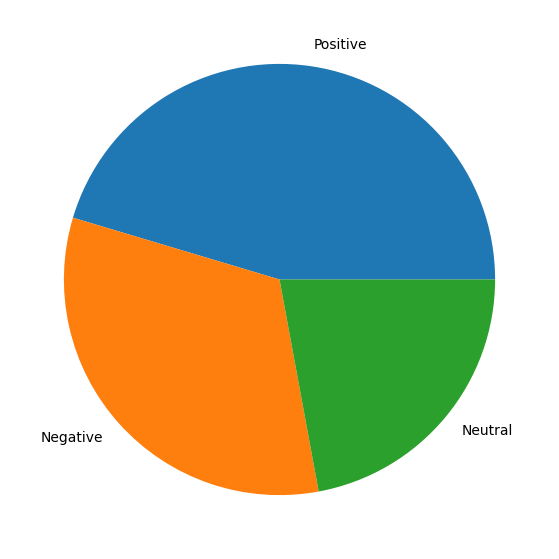

In [16]:
from matplotlib import pyplot as plt 
plt.figure(figsize =(10, 7)) 
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral']) 

### Vectorization

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]


### Visualizing top 20 unigrams

<Axes: title={'center': 'Top 20 unigrams in review after removing stop words'}, xlabel='snippet'>

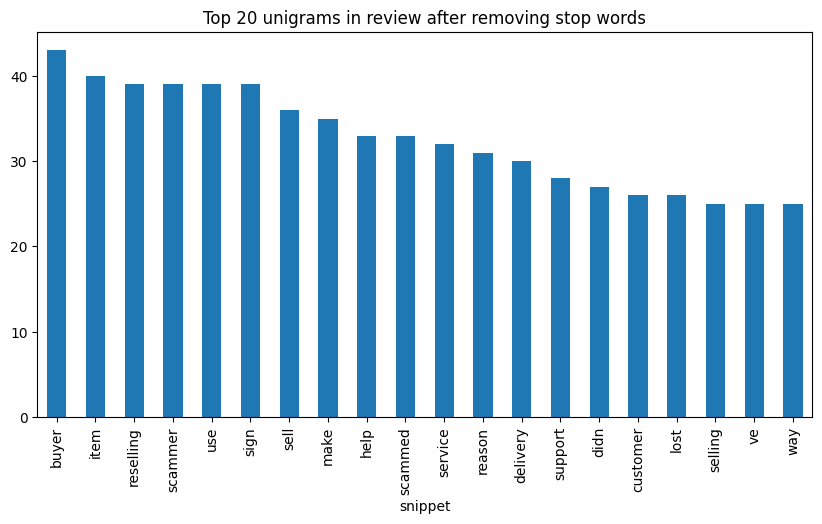

In [18]:
common_words = top_n_ngram(data['snippet'], 20,1)
df = pd.DataFrame(common_words, columns = ['snippet' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('snippet').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

### top 20 bigrams

<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='snippet'>

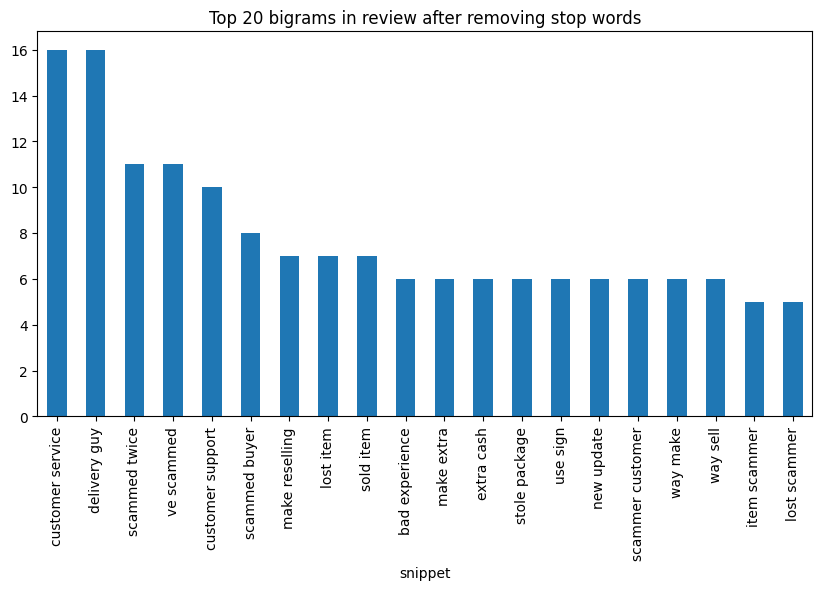

In [19]:
common_words = top_n_ngram(data['snippet'], 20,2)
df = pd.DataFrame(common_words, columns = ['snippet' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('snippet').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in review after removing stop words')

### Visualizing Top 20 trigrams

<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='snippet'>

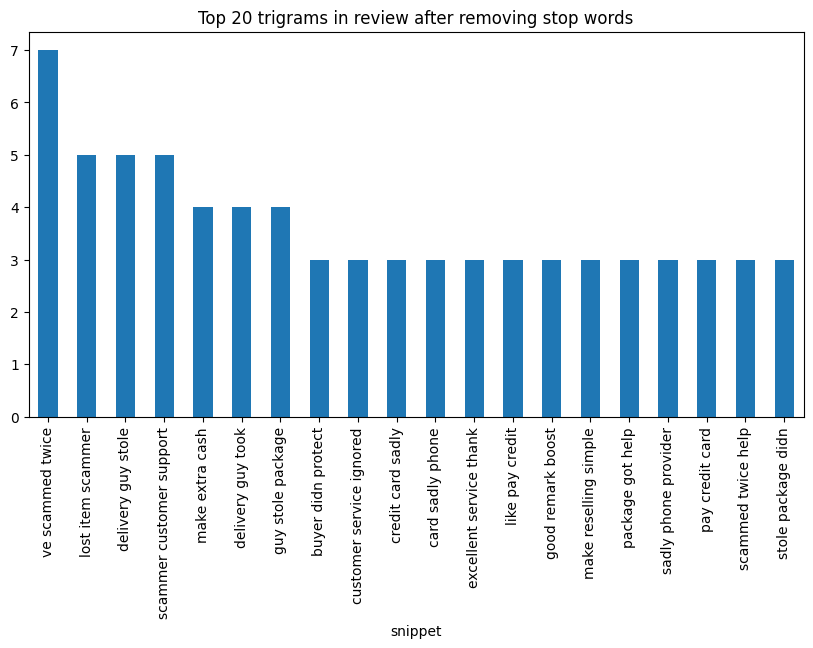

In [20]:
common_words = top_n_ngram(data['snippet'], 20,3)
df = pd.DataFrame(common_words, columns = ['snippet' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('snippet').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 trigrams in review after removing stop words')

In [21]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# blob= TextBlob(str(data['snippet']))
# pos = pd.DataFrame(blob.tags,columns =['word','pos'])
# pos1 = pos.pos.value_counts()[:20]
# plt.figure(figsize = (10,5))
# pos1.plot(kind='bar',title ='Top 20 Part-of-speech taggings')

In [23]:
X = pd.DataFrame({
    'polarity': data['polarity'],  # Assuming the 'polarity' column already exists
    'review_len': data['review_len'],  # Length of the review (number of characters)
    'token_count': data['token_count']  # Number of tokens in each review
})

# Display the resulting DataFrame
print(X.head())

   polarity  review_len  token_count
0  0.000000          31            5
1  0.333333          30            4
2  0.000000          27            4
3 -0.300000          26            5
4 -0.316667          40            6


### Correlation HeatMap

<Axes: >

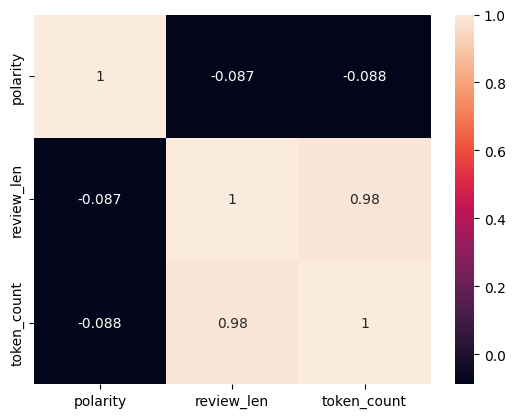

In [24]:
import seaborn as sns
sns.heatmap(X.corr(),annot =True)

In [25]:
set1 =set()
cor = X.corr()
for i in cor.columns:
    for j in cor.columns:
        if cor[i][j]>0.8 and i!=j:
            set1.add(i)
print(set1)

{'token_count', 'review_len'}


In [26]:
print(X.columns)

Index(['polarity', 'review_len', 'token_count'], dtype='object')


In [27]:
X = X.drop(columns='token_count',axis=1, inplace=False) #because it's highly correlated with review len


In [28]:
print(X.columns)
print(X.head)


Index(['polarity', 'review_len'], dtype='object')
<bound method NDFrame.head of      polarity  review_len
0    0.000000          31
1    0.333333          30
2    0.000000          27
3   -0.300000          26
4   -0.316667          40
..        ...         ...
565  0.000000          80
566 -0.270000         102
567 -0.350000         111
568 -0.175000          28
569  0.600000          20

[570 rows x 2 columns]>


<Axes: >

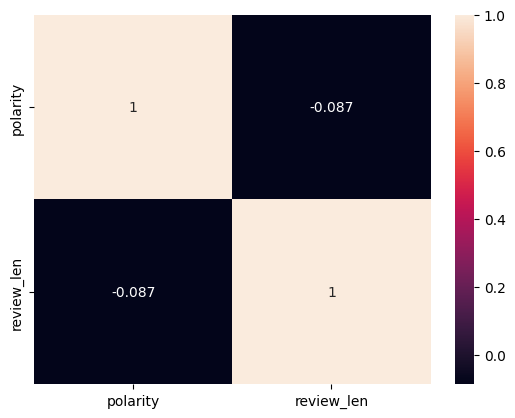

In [29]:
sns.heatmap(X.corr(),annot =True)

### Labeling

In [30]:
class1 =[]
for i in X.polarity:
    if float(i)>=0:
        class1.append(1)
    elif float(i)<0:
        class1.append(0)
X['sentiment'] = class1

In [31]:
y = X['sentiment']
print(y)

0      1
1      1
2      1
3      0
4      0
      ..
565    1
566    0
567    0
568    0
569    1
Name: sentiment, Length: 570, dtype: int64


In [32]:
corpus = data['snippet'].tolist()
print(corpus)
print(len(corpus))

['nothing scammed i’m never using', 'userfriendly design quick sale', 'reason can’t access listing', 'forced use sign don’t like', 'wish signup option forced use ridiculous', 'reselling earning fast!', 'tried reach support never responded', 'let sign isn’t secure', 'sell without hassle', 'perfect selling without hassle', 'frustrating keep getting reason', 'lost item scammer worth', 'randomly one responded support ticket', 'i’ve lost much scammer one helping', 'straightforward selling process', 'turning unused cash', 'delivery guy stole package didn’t anything', 'fantastic sell anything closet!', 'can’t sign without dealbreaker', 'don’t trust anymore many scammer protection', 'reason i’m unable recover', 'simple effective way resell', 'cant sign without that’s huge problem', 'sold first item day app!', 'quick efficient fun best way sell', 'issue delivery took week get response', 'app! make reselling breeze', 'delivery guy steal package doesnt care', 'cant believe bad customer service', 

In [33]:
def cal_score(name,model,folds):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    avg_result=[]
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = folds, scoring = sc)
        avg_result.append(np.average(scores))
    df_avg_score=pd.DataFrame(avg_result)
    df_avg_score= df_avg_score.rename(index={0: 'Accuracy', 1:'Precision', 2:'Recall',3:'F1 score',4:'Roc auc'},columns={0:'Average'})
    avg_accuracies[name]=np.round(df_avg_score.loc['Accuracy']*100,3)
    values=[np.round(df_avg_score.loc['Accuracy']*100,3),np.round(df_avg_score.loc['Precision']*100,3),np.round(df_avg_score.loc['Recall']*100,3),np.round(df_avg_score.loc['F1 score']*100,3),np.round(df_avg_score.loc['Roc auc']*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('mako')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Roc auc'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameters',labelpad=10)
    plt.title('Cross Validation '+str(folds)+'-Folds Average Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [34]:
def conf_matrix(ytest,pred):
    plt.figure(figsize=(9,6))
    global cm1
    cm1 = confusion_matrix(ytest, pred)
    ax=sns.heatmap(cm1, annot= True, cmap='Blues')
    plt.title('Confusion Matrix',pad=20)

In [35]:
def metrics_score(cm):
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    specificity = cm[0,0]/(cm[0,1]+cm[0,0])
    values=[np.round(accuracy*100,3),np.round(precision*100,3),np.round(sensitivity*100,3),np.round(f1*100,3),np.round(specificity*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('magma')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Specificity'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameter',labelpad=10)
    plt.title('Metrics Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()


In [36]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='Orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('True Positive Rate',labelpad=10)
    plt.xlabel('False Positive Rate',labelpad=10)
    plt.title('Receiver Operating Characteristic (ROC) Curve',pad=20)
    plt.legend()
    plt.show()

In [37]:
avg_accuracies={}
accuracies={}
roc_auc={}
pr_auc={}

### Bag of Words Technique

In [38]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv  = CV(max_features = 3000,ngram_range=(1,1))
X_cv = cv.fit_transform(corpus).toarray()
y = y.values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = 0.20, random_state = 0)

In [40]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

classifier = BernoulliNB()
classifier.fit(X_train, y_train)
prediction1 = classifier.predict(X_test)
accuracy1 = classifier.score(X_test, y_test) 
print ('Model Accuracy:',accuracy1 * 100)
accuracies['Bag of Words'] = np.round(accuracy1 * 100,3)


Model Accuracy: 78.94736842105263


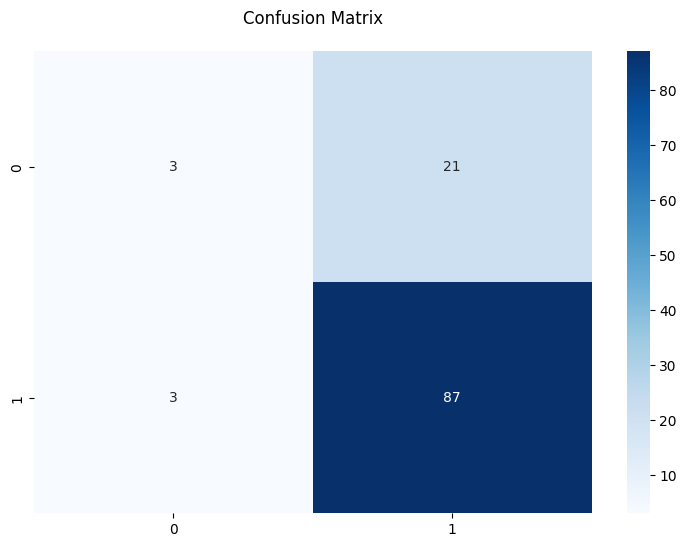

In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix(y_test,prediction1)

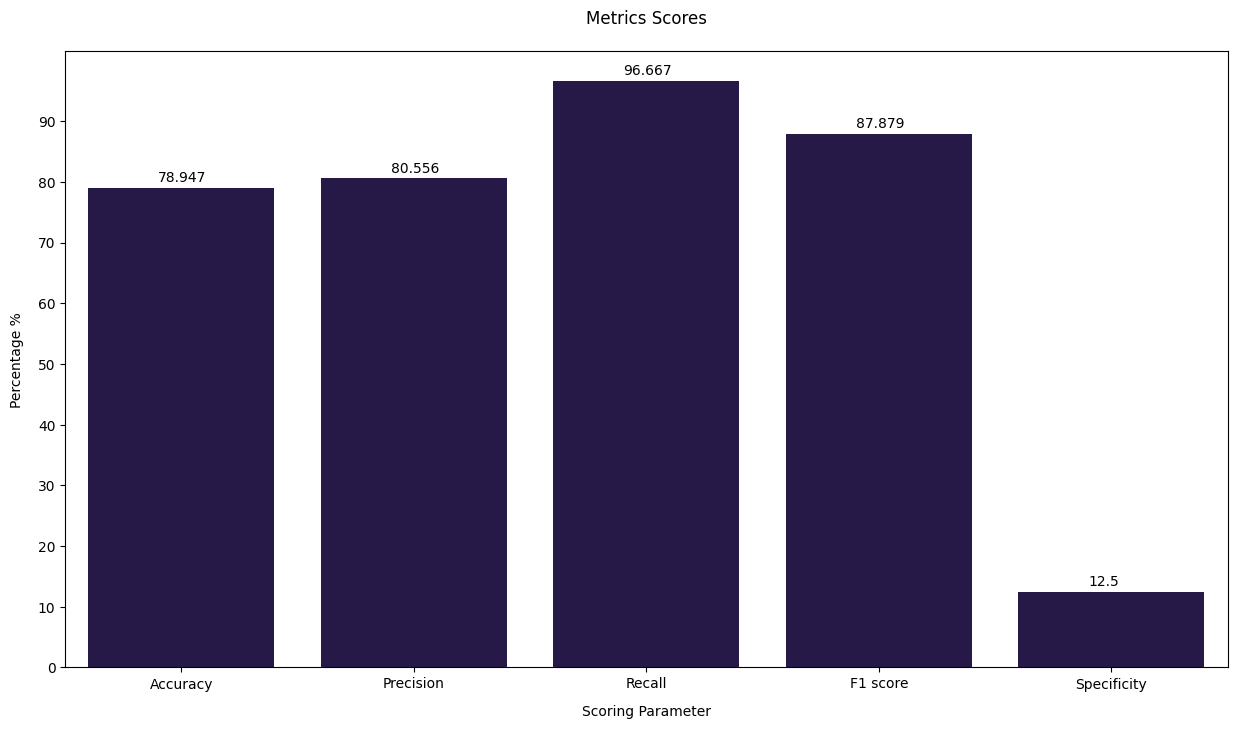

In [42]:
metrics_score(cm1)

Area under the ROC Curve (AUC): 0.88


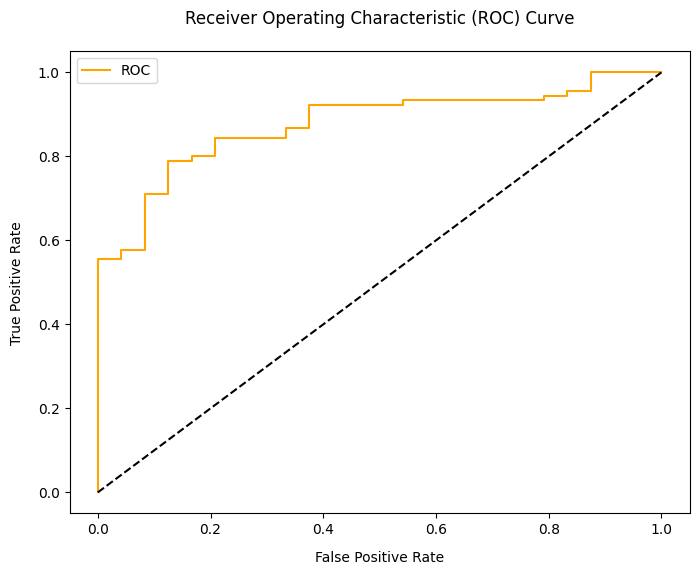

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc1 = roc_auc_score(y_test, probs)
roc_auc['Bag of Words']=np.round(auc1,3)
print('Area under the ROC Curve (AUC): %.2f' % auc1)
fpr1, tpr1, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr1, tpr1)

### Term Frequency- Inverse Document Frequency Technique

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tv  = TV(ngram_range =(1,1),max_features = 3000)
X_tv = tv.fit_transform(corpus).toarray()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
prediction2 = classifier.predict(X_test)
accuracy2 = classifier.score(X_test, y_test) 
print ('Model Accuracy:',accuracy2 * 100)
accuracies['TF - IDF'] = np.round(accuracy2 * 100,3)


Model Accuracy: 81.57894736842105


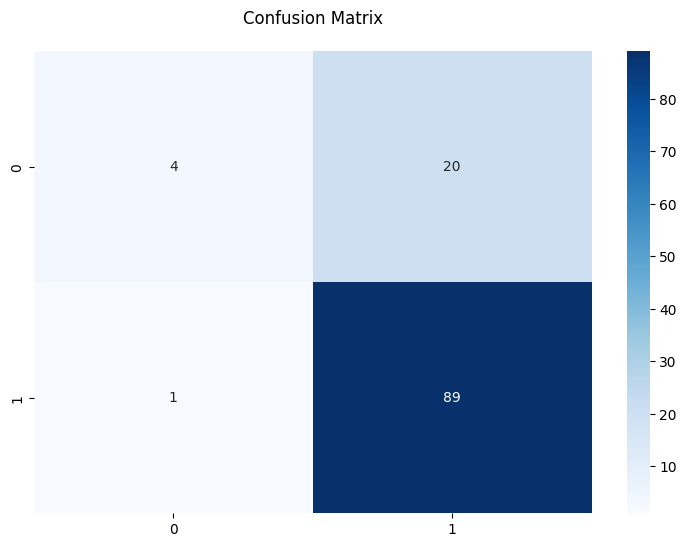

In [46]:
conf_matrix(y_test,prediction2)  

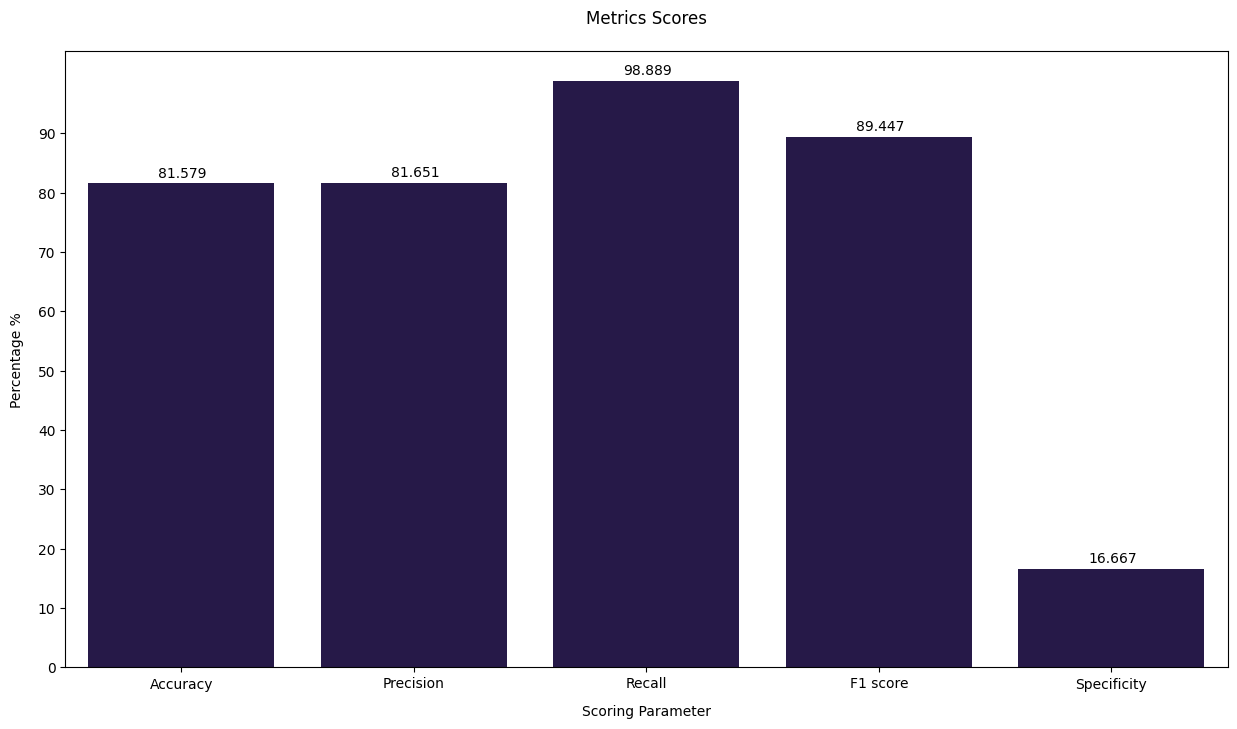

In [47]:
metrics_score(cm1)

Area under the ROC Curve (AUC): 0.91


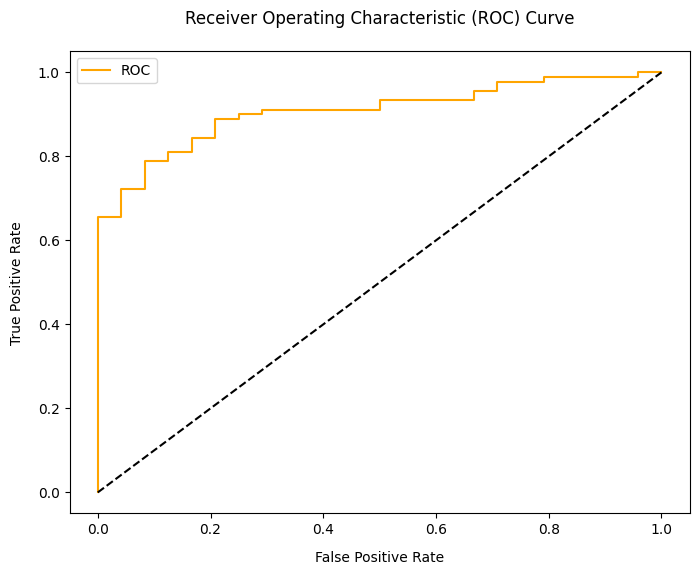

In [48]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc3 = roc_auc_score(y_test, probs)
roc_auc['TF - IDF']=np.round(auc3,3)
print('Area under the ROC Curve (AUC): %.2f' % auc3)
fpr3, tpr3, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr3, tpr3)

### Comparaison

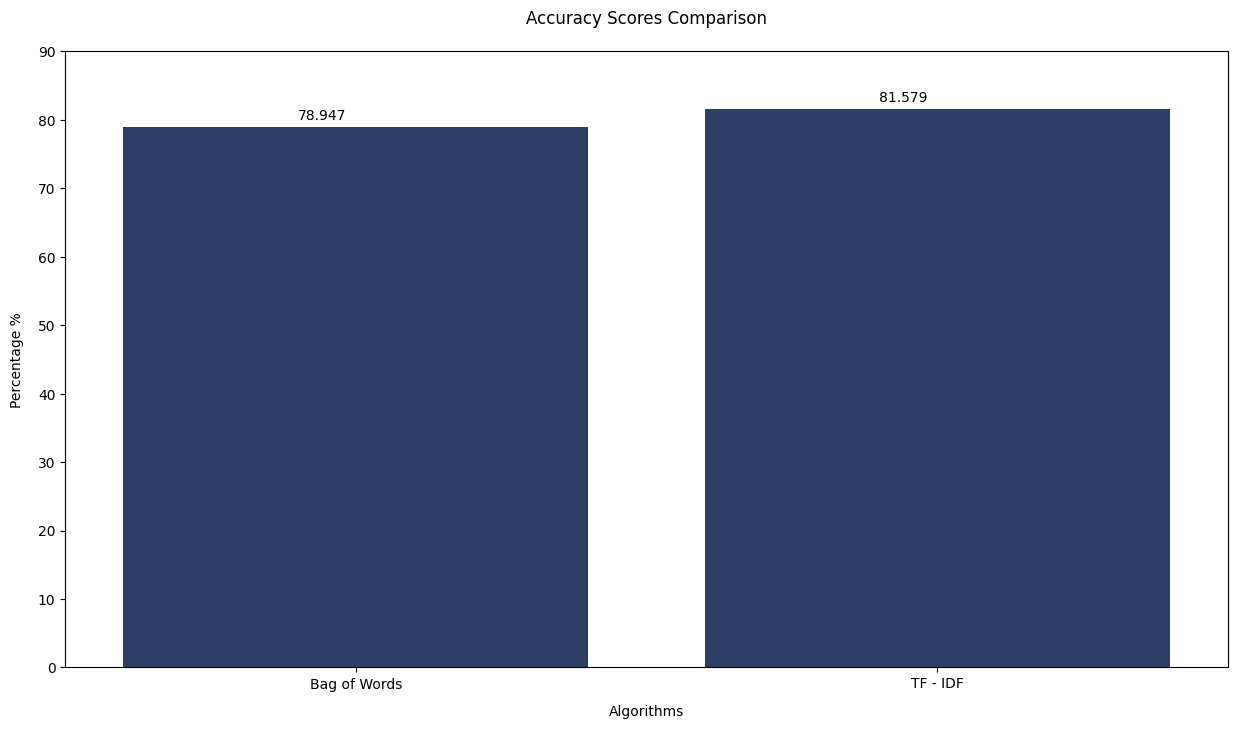

In [51]:
plt.figure(figsize=(15,8))
sns.set_palette('cividis')
ax=sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Percentage %',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Accuracy Scores Comparison',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
plt.show()

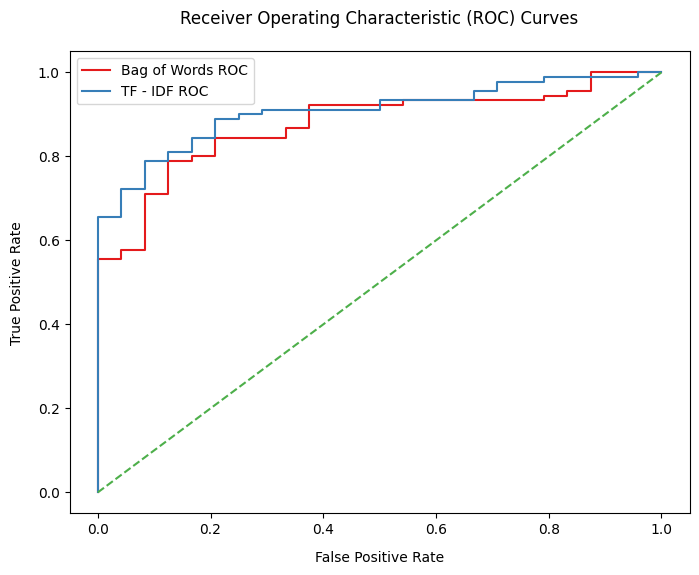

In [53]:
plt.figure(figsize=(8,6))
sns.set_palette('Set1')
plt.plot(fpr1, tpr1, label='Bag of Words ROC')
plt.plot(fpr3, tpr3, label='TF - IDF ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate',labelpad=10)
plt.xlabel('False Positive Rate',labelpad=10)
plt.title('Receiver Operating Characteristic (ROC) Curves',pad=20)
plt.legend()
plt.show()